In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import corner 

f = '/Users/georgeau/Desktop/GitHub/august/model_identification/affine_MCMC_PT/full_transporter_20220105_202734_data.csv'
n_cols = 25
D_list = []
col_list = [i+1 for i in range(n_cols)]  # only keep columns 1...n_p-1 
D_tmp = np.genfromtxt(f, delimiter=',', skip_header=1,usecols=col_list).T  
print('data loaded')

data loaded


(100000,)
[(-4, 5), (-4, 5), (4, 13), (-3, 6), (-3, 6), (1, 10), (-4, 5), (-4, 5), (-3, 6), (1, 10), (-4, 5), (-4, 5), (4, 13), (-3, 6), (-4, 5), (-4, 5), (-3, 6), (4, 13), (1, 10), (-3, 6), (1, 10), (-3, 6), (-3, 6), (4, 13), (-17.30102999566398, -11.301029995663981)]
[ -4.  -4.  10.   3.   3.   7.   2.   2.  -3.   1.   2.   2.   4.  -3.
  -4.  -4.  -3.   4.   1.  -3.   7.   3.   3.  10. -13.]


Text(0.5, 0.98, '1d marginal posterior distributions (log10 space)')

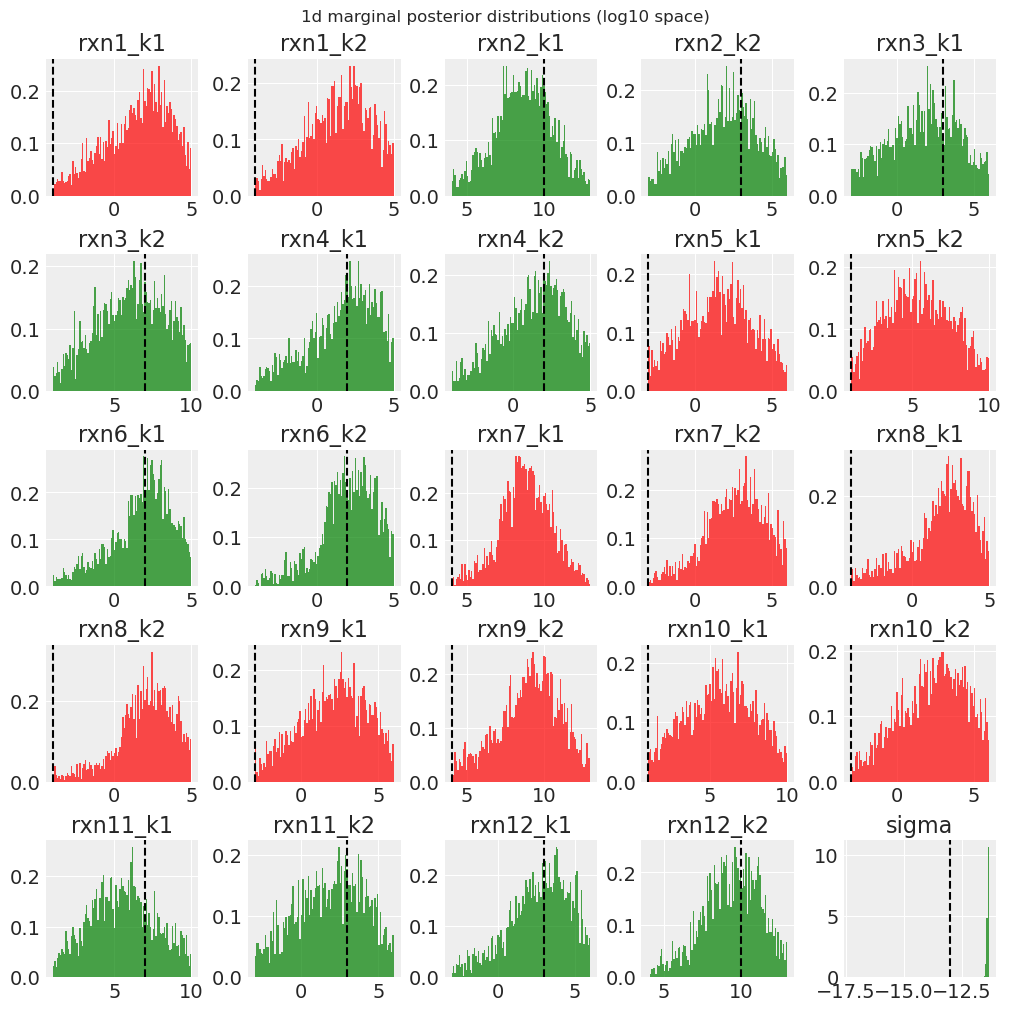

In [37]:
print(np.shape(D_tmp[0]))

labels = [
    'rxn1_k1',
    'rxn1_k2',
    'rxn2_k1',
    'rxn2_k2',
    'rxn3_k1',
    'rxn3_k2',
    'rxn4_k1',
    'rxn4_k2',
    'rxn5_k1',
    'rxn5_k2',
    'rxn6_k1',
    'rxn6_k2',
    'rxn7_k1',
    'rxn7_k2',
    'rxn8_k1',
    'rxn8_k2',
    'rxn9_k1',
    'rxn9_k2',
    'rxn10_k1',
    'rxn10_k2',
    'rxn11_k1',
    'rxn11_k2',
    'rxn12_k1',
    'rxn12_k2',
    'sigma'
]

s=0
sigma_ref = 1e-13
k_H_on = np.log10(1e10)
k_H_off = np.log10(1e3)
k_S_on = np.log10(1e7)
k_S_off = np.log10(1e3)
k_conf = np.log10(1e2)

k_conf_range = (-1-s,5)
k_H_on_range = (7-s,13)
k_H_off_range = (0-s,6)
k_S_on_range = (4-s,10)
k_S_off_range = (0-s,6)
sigma_range = (np.log10(5e-15)-s,np.log10(5e-12))


### boundary ranges
bounds=[0]*25
bounds[0] = k_conf_range  # rxn1_k1
bounds[1] = k_conf_range  # rxn1_k2

# rxn2: OF + $H_out -> OF_Hb; vol*(rxn2_k1*OF*H_out - rxn2_k2*OF_Hb)
bounds[2] = k_H_on_range # rxn2_k1
bounds[3] = k_H_off_range  # rxn2_k2

# rxn3: OF_Sb -> OF + $S_out; vol*(rxn3_k1*OF_Sb - rxn3_k2*OF*S_out)
bounds[4] = k_S_off_range  # rxn3_k1
bounds[5] = k_S_on_range # rxn3_k2

# rxn4: OF_Hb -> IF_Hb; vol*(rxn4_k1*OF_Hb - rxn4_k2*IF_Hb)
bounds[6] = k_conf_range # rxn4_k1
bounds[7] = k_conf_range # rxn4_k2

# rxn5: OF_Hb_Sb -> OF_Hb + $S_out; vol*(rxn5_k1*OF_Hb_Sb - rxn5_k2*OF_Hb*S_out)
bounds[8] = k_S_off_range # rxn5_k1
bounds[9] = k_S_on_range # rxn5_k2

# rxn6: IF_Sb -> OF_Sb; vol*(rxn6_k1*IF_Sb - rxn6_k2*OF_Sb)
bounds[10] = k_conf_range # rxn6_k1
bounds[11] = k_conf_range # rxn6_k2

# rxn7: OF_Sb + $H_out -> OF_Hb_Sb; vol*(rxn7_k1*OF_Sb*H_out - rxn7_k2*OF_Hb_Sb)
bounds[12] = k_H_on_range # rxn7_k1
bounds[13] = k_H_off_range  # rxn7_k2

# rxn8: OF_Hb_Sb -> IF_Hb_Sb; vol*(rxn8_k1*OF_Hb_Sb - rxn8_k2*IF_Hb_Sb)
bounds[14] = k_conf_range # rxn8_k1 
bounds[15] = k_conf_range  # rxn8_k2

# rxn9: IF_Hb -> IF + H_in; vol*(rxn9_k1*IF_Hb - rxn9_k2*IF*H_in)
bounds[16] = k_H_off_range  # rxn9_k1
bounds[17] = k_H_on_range   # rxn9_k2   

# rxn10: IF + S_in -> IF_Sb; vol*(rxn10_k1*IF*S_in - rxn10_k2*IF_Sb)
bounds[18] = k_S_on_range   # rxn10_k1
bounds[19] = k_S_off_range   # rxn10_k2    

# rxn11: IF_Hb + S_in -> IF_Hb_Sb; vol*(rxn11_k1*IF_Hb*S_in - rxn11_k2*IF_Hb_Sb)
bounds[20] = k_S_on_range  # rxn11_k1
bounds[21] = k_S_off_range   # rxn11_k2    

# rxn12: IF_Hb_Sb -> IF_Sb + H_in; vol*(rxn12_k1*IF_Hb_Sb - rxn12_k2*IF_Sb*H_in)
bounds[22] = k_H_off_range  # rxn12_k1
bounds[23] = k_H_on_range  # rxn12_k2    

# experimental noise
bounds[24] = sigma_range # sigma  
print(bounds)

### reference values
p_ref = np.zeros(25)

p_ref[0] = k_conf_range[0]  # rxn1_k1
p_ref[1] = k_conf_range[0]  # rxn1_k2

# rxn2: OF + $H_out -> OF_Hb; vol*(rxn2_k1*OF*H_out - rxn2_k2*OF_Hb)
p_ref[2] = k_H_on_range[0] # rxn2_k1
p_ref[3] = k_H_off_range[0]  # rxn2_k2

# rxn3: OF_Sb -> OF + $S_out; vol*(rxn3_k1*OF_Sb - rxn3_k2*OF*S_out)
p_ref[4] = k_S_off_range[0]  # rxn3_k1
p_ref[5] = k_S_on_range[0] # rxn3_k2

# rxn4: OF_Hb -> IF_Hb; vol*(rxn4_k1*OF_Hb - rxn4_k2*IF_Hb)
p_ref[6] = k_conf_range[0] # rxn4_k1
p_ref[7] = k_conf_range[0] # rxn4_k2

# rxn5: OF_Hb_Sb -> OF_Hb + $S_out; vol*(rxn5_k1*OF_Hb_Sb - rxn5_k2*OF_Hb*S_out)
p_ref[8] = k_S_off_range[0] # rxn5_k1
p_ref[9] = k_S_on_range[0] # rxn5_k2

# rxn6: IF_Sb -> OF_Sb; vol*(rxn6_k1*IF_Sb - rxn6_k2*OF_Sb)
p_ref[10] = k_conf_range[0] # rxn6_k1
p_ref[11] = k_conf_range[0] # rxn6_k2

# rxn7: OF_Sb + $H_out -> OF_Hb_Sb; vol*(rxn7_k1*OF_Sb*H_out - rxn7_k2*OF_Hb_Sb)
p_ref[12] = k_H_on_range[0] # rxn7_k1
p_ref[13] = k_H_off_range[0]  # rxn7_k2

# rxn8: OF_Hb_Sb -> IF_Hb_Sb; vol*(rxn8_k1*OF_Hb_Sb - rxn8_k2*IF_Hb_Sb)
p_ref[14] = k_conf_range[0] # rxn8_k1 
p_ref[15] = k_conf_range[0]  # rxn8_k2

# rxn9: IF_Hb -> IF + H_in; vol*(rxn9_k1*IF_Hb - rxn9_k2*IF*H_in)
p_ref[16] = k_H_off_range[0]  # rxn9_k1
p_ref[17] = k_H_on_range[0]   # rxn9_k2   

# rxn10: IF + S_in -> IF_Sb; vol*(rxn10_k1*IF*S_in - rxn10_k2*IF_Sb)
p_ref[18] = k_S_on_range[0]   # rxn10_k1
p_ref[19] = k_S_off_range[0]   # rxn10_k2    

# rxn11: IF_Hb + S_in -> IF_Hb_Sb; vol*(rxn11_k1*IF_Hb*S_in - rxn11_k2*IF_Hb_Sb)
p_ref[20] = k_S_on_range[0] # rxn11_k1
p_ref[21] = k_S_off_range[0]   # rxn11_k2    

# rxn12: IF_Hb_Sb -> IF_Sb + H_in; vol*(rxn12_k1*IF_Hb_Sb - rxn12_k2*IF_Sb*H_in)
p_ref[22] = k_H_off_range[0] # rxn12_k1
p_ref[23] = k_H_on_range[0]  # rxn12_k2    

# experimental noise
p_ref[24] = sigma_range[0] # sigma

p_ref[2] = k_H_on
p_ref[3] = k_H_off
p_ref[4] = k_S_off
p_ref[5] = k_S_on
p_ref[6] = k_conf
p_ref[7] = k_conf
p_ref[10] = k_conf
p_ref[11] = k_conf
p_ref[20] = k_S_on
p_ref[21] = k_S_off
p_ref[22] = k_H_off
p_ref[23] = k_H_on
p_ref[24] = np.log10(sigma_ref)
print(p_ref)


fig, axes = plt.subplots(5, 5, figsize=(10,10))
ax = axes.flatten()

d_dict = {}
ref_idx_list = [2,3,4,5,6,7,10,11,20,21,22,23,24]
for i, lbl in enumerate(labels):
    p_data = D_tmp[i]
    d_dict[lbl] = p_data
    
    if i in ref_idx_list:
        ax[i].hist(p_data, alpha=0.7, bins=100, range=bounds[i], color='green', density=True)
    else:
        ax[i].hist(p_data, alpha=0.7, bins=100, range=bounds[i], color='red', density=True)
    ax[i].axvline(x=p_ref[i], ymin=0, ymax=1, color='black', ls='--')
    ax[i].set_title(f'{labels[i]}')
plt.suptitle('1d marginal posterior distributions ')

# for i, lbl in enumerate(labels):

#     az.plot_posterior(D_tmp[i], label)